In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
np.random.seed(0)

In [5]:
!ls ../data/raw

issues_test.tsv  issues_train.tsv


In [6]:
issues_train = pd.read_csv("../data/raw/issues_train.tsv", sep='\t')
issues_test = pd.read_csv("../data/raw/issues_test.tsv", sep='\t')

In [7]:
issues_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13029 entries, 0 to 13028
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           13029 non-null  int64 
 1   Area         13029 non-null  object
 2   Title        13029 non-null  object
 3   Description  12523 non-null  object
dtypes: int64(1), object(3)
memory usage: 407.3+ KB


In [8]:
issues_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           3257 non-null   int64 
 1   Area         3257 non-null   object
 2   Title        3257 non-null   object
 3   Description  3176 non-null   object
dtypes: int64(1), object(3)
memory usage: 101.9+ KB


In [9]:
issues_train.head()

,ID,Area,Title,Description
0,17,area-System.Xml,Some XPath.XDocument tests are failing,Some XPath.XDocument queries have different re...
1,20,area-System.Xml,2 XPath.XDocument tests fail because of lackin...,XPath.XDocument navigator doesn't support Move...
2,22,area-System.Numerics,Two Numerics Tests are failing only on our CI ...,Two of the tests in our System.Numerics.Vector...
3,36,area-System.Numerics,SIMD test failures on non-ENU configurations.,After pulling both of @adamralph 's pull reque...
4,41,area-System.Numerics,Quaternion operator overloads should be using ...,Quaternion declares a handful of methods to pe...


In [10]:
issues_train['Area'].nunique()

22

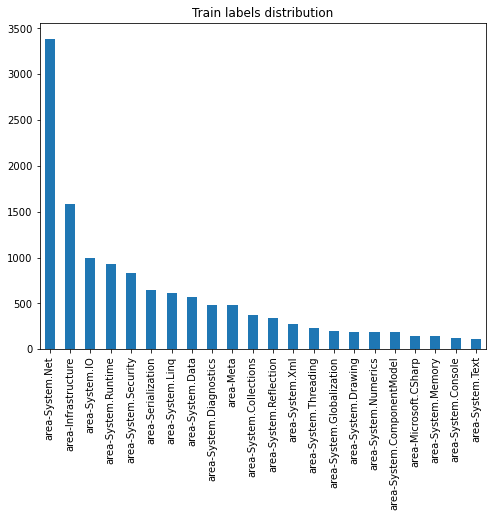

In [11]:
issues_train['Area'].value_counts().plot.bar(figsize=(8, 6), title="Train labels distribution")

Text(0, 0.5, '# of classes')

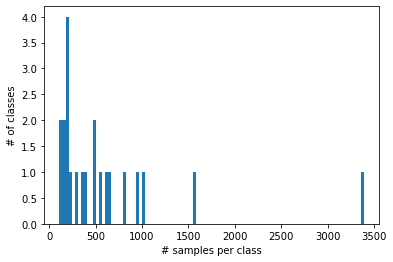

In [23]:
issues_train["Area"].value_counts().plot.hist(bins=100)
plt.xlabel("# samples per class")
plt.ylabel("# of classes")

In [10]:
issues_train.isna().sum() / issues_train.shape[0]

ID             0.000000
Area           0.000000
Title          0.000000
Description    0.038836
dtype: float64

In [11]:
issues_train = issues_train.fillna('')

In [12]:
for idx, item in issues_train.head(5).iterrows():
    print(item['Area'])
    print(item['Title'])
    print(item['Description'])
    print("-"*10)

area-System.Xml
Some XPath.XDocument tests are failing
Some XPath.XDocument queries have different results than other XPath navigators. This might be an old behavior or newly introduced bug.  Failing tests: build /p=IncludeTraits=ActiveIssue=17 
----------
area-System.Xml
2 XPath.XDocument tests fail because of lacking feature
XPath.XDocument navigator doesn't support MoveToId(string).  Verify if this was ever supported. If it was, verify if we want to support it in the future. If it wasn't move the tests to a different file and remove them from XPath.XDocument.Tests project.  Failing tests: NodeSetFunctionsTest2267 MatchesTest2352  <!--- @huboard:{"order":20.0,"milestone_order":20,"custom_state":""} --> 
----------
area-System.Numerics
Two Numerics Tests are failing only on our CI server
Two of the tests in our System.Numerics.Vectors suite are failing only on our CI build server, and potentially only intermittently:  Vector2NormalizeTest1 Vector4NormalizeTest2  Given that these are v

In [13]:
issues_train_text_len = issues_train[['Title', 'Description']].applymap(len)

<AxesSubplot:ylabel='Frequency'>

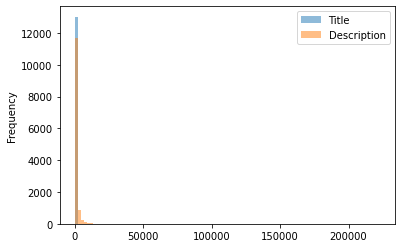

In [14]:
issues_train_text_len.plot.hist(alpha=0.5, bins=100)

In [16]:
issues_train_text_len.plot.hist(alpha=0.5, bins=100)

(array([12994,    19,     8,     4,     1,     1,     1,     0,     0,
            1]),
 array([     0. ,  22247.9,  44495.8,  66743.7,  88991.6, 111239.5,
        133487.4, 155735.3, 177983.2, 200231.1, 222479. ]))

(array([0.89815028, 0.96408013, 0.98250058, 0.98894773, 0.99278533,
        0.99462737, 0.9957019 , 0.99623916, 0.99692993, 0.99731368,
        0.9977742 , 0.99800445, 0.99823471, 0.99838821, 0.99846496,
        0.99854171, 0.99861847, 0.99869522, 0.99869522, 0.99877197,
        0.99892547, 0.99900223, 0.99915573, 0.99915573, 0.99915573,
        0.99923248, 0.99930923, 0.99938599, 0.99938599, 0.99938599,
        0.99938599, 0.99946274, 0.99946274, 0.99946274, 0.99946274,
        0.99946274, 0.99946274, 0.99946274, 0.99953949, 0.99969299,
        0.99969299, 0.99969299, 0.99969299, 0.99969299, 0.99969299,
        0.99969299, 0.99969299, 0.99969299, 0.99976974, 0.99976974,
        0.99976974, 0.99976974, 0.99976974, 0.9998465 , 0.9998465 ,
        0.9998465 , 0.9998465 , 0.9998465 , 0.9998465 , 0.9998465 ,
        0.99992325, 0.99992325, 0.99992325, 0.99992325, 0.99992325,
        0.99992325, 0.99992325, 0.99992325, 0.99992325, 0.99992325,
        0.99992325, 0.99992325, 0.99992325, 0.99

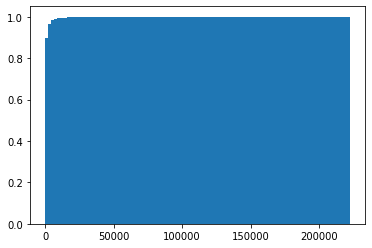

In [22]:
plt.hist(issues_train_text_len["Description"], cumulative=True, bins=100, density=True)

In [28]:
issues_train_text_lenxt_len["Description"].quantile(0.80)

1305.0

In [33]:
issues_train["Description"].str.split().map(len).describe()

count    13029.000000
mean        99.193568
std        269.511927
min          0.000000
25%         21.000000
50%         49.000000
75%        108.000000
max      13598.000000
Name: Description, dtype: float64

In [16]:
issues_train_text_len.describe()

,Title,Description
count,13029.000000,13029.000000
mean,61.247602,1090.548546
std,28.763211,3820.716656
min,4.000000,0.000000
25%,42.000000,171.000000
50%,56.000000,442.000000
75%,73.000000,1054.000000
max,272.000000,222479.000000


<AxesSubplot:title={'center':'Title and Description length distribution'}>

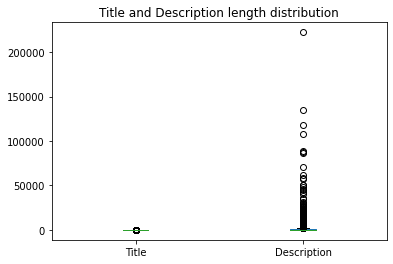

In [17]:
issues_train_text_len.plot.box(title='Title and Description length distribution')

In [18]:
order = np.argsort(issues_train_text_len['Description'].values)[::-1]
for i in order[:2]:
    print(issues_train.iloc[i]['Description'])
    print("-"*10)

``` 03:30:45 Starting:    System.Net.Security.Tests 03:30:46 ---- DEBUG ASSERTION FAILED ---- 03:30:46 ---- Assert Short Message ---- 03:30:46  Exception Caught. - Interop+OpenSsl+SslException: error:1408A0C1:SSL routines:SSL3_GET_CLIENT_HELLO:no shared cipher ---> Interop+Crypto+OpenSslCryptographicException: error:1408A0C1:SSL routines:SSL3_GET_CLIENT_HELLO:no shared cipher 03:30:46    --- End of inner exception stack trace --- 03:30:46    at Interop.OpenSsl.DoSslHandshake(SafeSslHandle context, Byte[] recvBuf, Int32 recvOffset, Int32 recvCount, Byte[]& sendBuf, Int32& sendCount) 03:30:46    at System.Net.SslStreamPal.HandshakeInternal(SafeFreeCredentials credential, SafeDeleteContext& context, SecurityBuffer inputBuffer, SecurityBuffer outputBuffer, Boolean isServer, Boolean remoteCertRequired) 03:30:46 ---- Assert Long Message ---- 03:30:46  03:30:46    at System.Environment.GetStackTrace(Exception e, Boolean needFileInfo) 03:30:46    at System.Environment.get_StackTrace() 03:30:46

Some descriptions are very long and contain stack traces. Let's just do not use `Description` for now.

# Clean descriptions

Some descriptions are very long and contain stack traces. Let's just do not use `Description` for now.

## remove between ```

In [19]:
import re

example_positive = r"""
hello my friend!
here is code sample:
```
for in in range(25):
    print(i)
    ```
do you like it?    
"""
example_negative = "there is no code"

In [20]:
regex = r"```[\s\S]*```"
re.sub(regex, "", example_positive)

'\nhello my friend!\nhere is code sample:\n\ndo you like it?    \n'

In [21]:
print("Distribution of train.Description with code samples between ```")
issues_train['Description'].map(len).describe()

Distribution of train.Description with code samples between ```


count     13029.000000
mean       1090.548546
std        3820.716656
min           0.000000
25%         171.000000
50%         442.000000
75%        1054.000000
max      222479.000000
Name: Description, dtype: float64

In [22]:
print("Distribution of train.Description W/O code samples between ```")
issues_train['Description'].str.replace(regex, "").map(len).describe()

Distribution of train.Description W/O code samples between ```


<ipython-input-22-94a1afc7e403>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  issues_train['Description'].str.replace(regex, "").map(len).describe()


count    13029.000000
mean       559.298872
std       1079.564634
min          0.000000
25%        121.000000
50%        295.000000
75%        640.000000
max      35870.000000
Name: Description, dtype: float64

That works, `mean` became 2 times smaller, `max` reduced in times.

In [23]:
def remove_formatted_code(series: pd.Series):
    regex = r"```[\s\S]*```"
    return series.str.replace(regex, "")

In [24]:
issues_train["Description_W/O_code"] = remove_formatted_code(issues_train['Description'])

<ipython-input-23-0ff739d5e2c1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  return series.str.replace(regex, "")


In [25]:
issues_test["Description_W/O_code"] = remove_formatted_code(issues_test['Description'])

<ipython-input-23-0ff739d5e2c1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  return series.str.replace(regex, "")


## check

In [26]:
for text in issues_train['Description_W/O_code'].sort_values(key=np.vectorize(len))[::-1].head(2):
    print(text)
    print("-"*10, "\n")

Detail: https://mc.dot.net/#/product/netcore/master/source/official~2Fcorefx~2Fmaster~2F/type/test~2Ffunctional~2Fcli~2F/build/20170703.01/workItem/System.Net.Security.Tests/wilogs    ~~~  2017-07-02 17:29:52,725: INFO: proc(54): run_and_log_output: Output: Discovering: System.Net.Security.Tests  2017-07-02 17:29:52,959: INFO: proc(54): run_and_log_output: Output: Discovered:  System.Net.Security.Tests  2017-07-02 17:29:53,105: INFO: proc(54): run_and_log_output: Output: Starting:    System.Net.Security.Tests  2017-07-02 17:29:53,766: INFO: proc(54): run_and_log_output: Output: FailFast: Expected offset 0 when decrypting  2017-07-02 17:29:53,766: INFO: proc(54): run_and_log_output: Output:   2017-07-02 17:29:53,766: INFO: proc(54): run_and_log_output: Output:    at System.Diagnostics.Debug.Assert(Boolean condition, String message, String detailMessage)  2017-07-02 17:29:53,766: INFO: proc(54): run_and_log_output: Output:    at System.Net.Security.SslStreamPal.EncryptDecryptHelper(SafeD

In [27]:
foo = issues_train['Description']
foo = foo.str.replace(r"```[\s\S]*```",  "")
foo = foo.str.replace(r"~~~[\s\S]*~~~",  "")

<ipython-input-27-792b7958f119>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  foo = foo.str.replace(r"```[\s\S]*```",  "")
<ipython-input-27-792b7958f119>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  foo = foo.str.replace(r"~~~[\s\S]*~~~",  "")


In [28]:
foo.map(len).describe()

count    13029.000000
mean       531.380766
std        974.963658
min          0.000000
25%        121.000000
50%        290.000000
75%        609.000000
max      35033.000000
Name: Description, dtype: float64

# Analyze Title

In [29]:
issues_train['Title'].head(10)

0               Some XPath.XDocument tests are failing
1    2 XPath.XDocument tests fail because of lackin...
2    Two Numerics Tests are failing only on our CI ...
3        SIMD test failures on non-ENU configurations.
4    Quaternion operator overloads should be using ...
5                           Add Linux/Mac build script
6    Made Quarternion's operator overloads use thei...
7    ReferenceSource repo license incorrect for ind...
8    Remove always true "if" and unreachable code i...
9    [Issue 54] Removed always-true if and unreacha...
Name: Title, dtype: object

In [30]:
!pip install sklearn

     |████████████████████████████████| 24.9 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 514 kB/s eta 0:00:01
     |████████████████████████████████| 303 kB 871 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=17a62a6a6a8f8f6ab830fa196c34bb40cb722e8d43736f35f68c5e0a55cd90e4
  Stored in directory: /home/skarasik/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
